In [1]:
import numpy as np, pandas as pd
import sympy as sym
from sympy import symbols, Matrix, solve, simplify

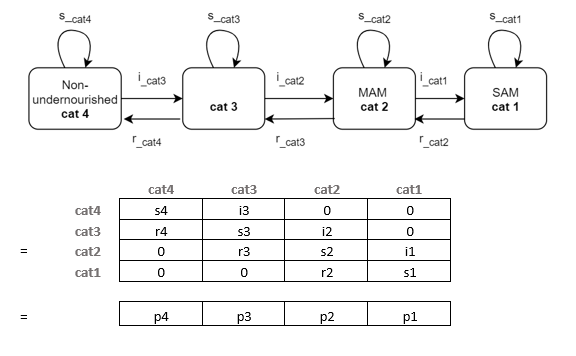

In [2]:
# define symbols
s4, i3 = symbols('s4 i3')
r4, s3, i2 = symbols('r4 s3 i2')
r3, s2, i1 = symbols('r3 s2 i1')
r2, s1 = symbols('r2 s1')
p4, p3, p2, p1 = symbols('p4 p3 p2 p1')

In [3]:
# # uncomment these if don't want to solve in terms of p_is
# p4 = 0.7
# p3 = 0.2
# p2 = 0.07 
# p1 = 0.03

In [4]:
unknowns = [s1,s2,s3,s4,r2,r3,r4,i1,i2,i3]

In [5]:
def add_eq(terms, y, i, A, v):
    """
    For input equation y = sum([coeff*var for var:coeff in {terms}])
    adds right side of equation to to row i of matrix A
    
    adds y to row i of vector v
    """
    for x in terms.keys():
        A[x][i] = terms[x]
    v.iloc[i] = y

![eqns](eqns_wasting_1x4.png)

In [6]:
# 1) p4*s4 + p3*r4 = p4 
eq1 = [{s4:p4, r4:p3}, p4]

# 2) p4*i3 + p3*s3 +p2*r3 = p3
eq2 = [{i3:p4, s3:p3, r3:p2}, p3]

# 3) p3*i2 + p2*s2 + p1*r2 = p2
eq3 = [{i2:p3, s2:p2, r2:p1}, p2]

# 4) p2*i1 + p1*s1 = p1
eq4 = [{i1:p2, s1:p1}, p1]

In [7]:
# 5) s4 + i3 =1
eq5 = [{s4:1, i3:1}, 1]

# 6) r4 + s3 + i2 = 1
eq6 = [{r4:1, s3:1, i2:1}, 1]

# 7) r3 + s2 + i1 =1
eq7 = [{r3:1, s2:1, i1:1}, 1]

# 8) r2 + s1 = 1
eq8 = [{r2:1, s1:1}, 1]

In [8]:
# 9) r2 = 1/Dsam
eq9 = [{r2:1}, 1/40]

# 10) r3 + i1  = 1/Dmam
eq10 = [{r3:1, i1:1}, 1/70]

In [9]:
# 1/dur_cat3 = i2 + r4
dur_cat3 = sym.Symbol('dur_cat3')

eq11 = [{i2:1, r4:1}, 1/dur_cat3]

In [10]:
def build_matrix(eqns, unknowns):
    """
    INPUT
    ----
    eqns: a list of sympy equations
    unknowns: a list of sympy unknowns
    ----
    OUTPUT
    ----
    A:  a matrix containing the coefficients of LHS of all eq in eqns.
        nrows = number of equations
        rcols = number of unknowns
    b: an nx1 matrix containing the RHS of all the eqns
    x: a sympy matrix of the unknowns
    """
    n_eqns = len(eqns)
    n_unknowns = len(unknowns)

    # frame for matrix/LHS equations.
    # nrows = n_eqns, ncols = n_unknowns
    A = pd.DataFrame(
        index = range(n_eqns),
        columns = unknowns,
        data = np.zeros([n_eqns,n_unknowns])
    )
    
    # frame for RHS of equations
    b = pd.DataFrame(index = range(n_eqns), columns = ['val'])
    
    # populate LHS/RHS
    i = 0
    for eq in eqns:
        add_eq(eq[0], eq[1], i, A, b)
        i += 1
    
    # convert to sympy matrices
    A = sym.Matrix(A)
    b = sym.Matrix(b)
    x = sym.Matrix(unknowns) #vars to solve for
    
    return A, x, b

In [11]:
# solve in terms of p1, p2, p3, p4, and one dependent unknown:
A0, x0, b0 = build_matrix([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10],
                         unknowns)


result_0 = sym.solve(A0 * x0 - b0, x0)

/share/code/beatrixh/miniconda/envs/linalg/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [22]:
A0 * x0 - b0

Matrix([
[          p3*r4 + p4*s4 - p4],
[  i3*p4 + p2*r3 + p3*s3 - p3],
[  i2*p3 + p1*r2 + p2*s2 - p2],
[          i1*p2 + p1*s1 - p1],
[                 i3 + s4 - 1],
[            i2 + r4 + s3 - 1],
[            i1 + r3 + s2 - 1],
[                 r2 + s1 - 1],
[                  r2 - 0.025],
[i1 + r3 - 0.0142857142857143]])

In [12]:
# the one unknown ends up being i3
result_0

{s1: 0.975000000000000,
 s2: 0.985714285714286,
 s3: -i3*p4/p3 + 0.00357142857142857*(7.0*p1 - 4.0*p2 + 280.0*p3)/p3,
 s4: 1.0 - i3,
 r2: 0.0250000000000000,
 r3: 0.00357142857142857*(-7.0*p1 + 4.0*p2)/p2,
 r4: i3*p4/p3,
 i1: 0.025*p1/p2,
 i2: 0.00357142857142857*(-7.0*p1 + 4.0*p2)/p3}

In [13]:
# observe i3 is slightly constrained from above:
# i3 < 1/3.5

# we need information on the relationship between s4 and s3

## need from the lit either: i3, s3, s4, r4, or dur_cat3

In [14]:
# solve in terms of duration of cat3 instead of i3:
# i2 + r4 = 1/dur_cat3
eq11

[{i2: 1, r4: 1}, 1/dur_cat3]

In [15]:
A1, x1, b1 = build_matrix([eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10,eq11],
                         unknowns)
result_1 = sym.solve(A1 * x1 - b1, x1)

/share/code/beatrixh/miniconda/envs/linalg/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [16]:
result_1

{s1: 0.975000000000000,
 s2: 0.985714285714286,
 s3: (dur_cat3 - 1.0)/dur_cat3,
 s4: 0.00357142857142857*(-7.0*dur_cat3*p1 + 4.0*dur_cat3*p2 + 280.0*dur_cat3*p4 - 280.0*p3)/(dur_cat3*p4),
 r2: 0.0250000000000000,
 r3: 0.00357142857142857*(-7.0*p1 + 4.0*p2)/p2,
 r4: 0.00357142857142857*(7.0*dur_cat3*p1 - 4.0*dur_cat3*p2 + 280.0*p3)/(dur_cat3*p3),
 i1: 0.025*p1/p2,
 i2: 0.00357142857142857*(-7.0*p1 + 4.0*p2)/p3,
 i3: 0.00357142857142857*(7.0*dur_cat3*p1 - 4.0*dur_cat3*p2 + 280.0*p3)/(dur_cat3*p4)}

In [17]:
# i3 from dur_cat3:
# i3 = 0.00357142857142857*(7.0*dur_cat3*p1 - 4.0*dur_cat3*p2 + 280.0*p3)/(dur_cat3*p4)